In [1]:
# Data imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# ML imports
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Reading in CSV file and visualizing top 5 rows
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
# Getting category variables
cats = [i for i in df.columns if df[i].dtype == 'object']
# Converting categorical variables to category type
df[cats] = df[cats].astype('category')

# Getting numerical variables
nums = [i for i in df.columns if i not in cats]

<Axes: >

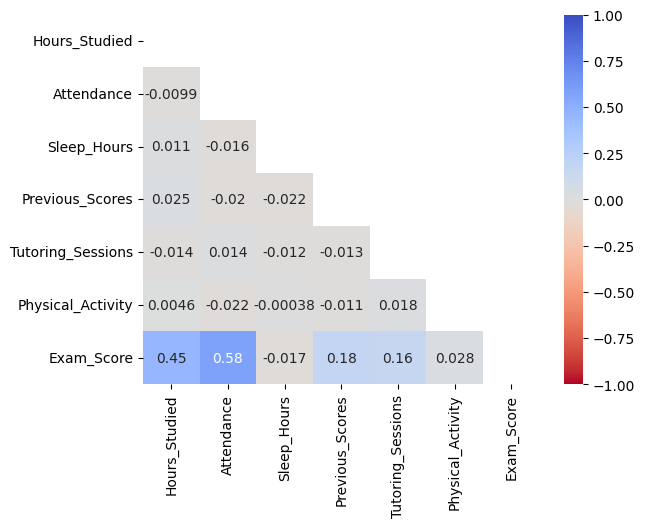

In [5]:
# Generating mask from correlation matrix
mask = np.zeros_like(df[nums].corr())

# Based on upper triangle, setting the values to True
mask[np.triu_indices_from(mask)] = True

# Generating heatmap for the matric
sns.heatmap(df[nums].corr(), mask=mask, cmap='coolwarm_r', annot=True,  vmin=-1, vmax=1)

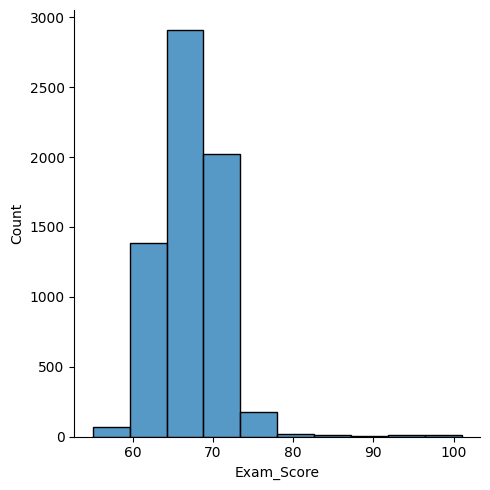

In [7]:
# Checking distribution of Exam_Score
sns.displot(data=df, x='Exam_Score', kind='hist', bins=10)

In [8]:
# Getting numerical columns apart from Exam Score
num_cols = [i for i in nums if i != 'Exam_Score']

# Defining impute function
def impute_mode(df, cols):
    for col in cols:
        df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Imputing missing values
df = impute_mode(df, cats)

# Defining ColumnTransformer to OneHotEncode categorical variables and StandardScale numerical variables
ct2 = ColumnTransformer(transformers=[('cat_ohe', OneHotEncoder(), cats)], remainder='passthrough')

# Defining pipeline with ColumnTransformer and Linear Regression
pipe = Pipeline(steps=[('ct2', ct2), ('lr', LinearRegression())])

In [9]:
# Defining training and testing data
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Fitting the model
pipe.fit(X_train, y_train)

Pipeline(steps=[('ct2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_ohe', OneHotEncoder(),
                                                  ['Parental_Involvement',
                                                   'Access_to_Resources',
                                                   'Extracurricular_Activities',
                                                   'Motivation_Level',
                                                   'Internet_Access',
                                                   'Family_Income',
                                                   'Teacher_Quality',
                                                   'School_Type',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home',
                                                   'Gender'])])),
                ('lr', LinearRegression())])

In [11]:
# Predicting on test data
y_preds = pipe.predict(X_test)

# Getting R2, MSE and RMSE
print(f"R2 Score: {r2_score(y_test, y_preds)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_preds)}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, y_preds, squared=False)}")

R2 Score: 0.7696495724907313
Mean Squared Error: 3.256019987042893
Root Mean Squared Error: 1.8044445092722838


/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
''' 
    Inference: 
        Model is able to predict 77% of the variance in Exam Score with the given features. 
        MSE of the model is 3.256
        RMSE of the model is 1.8
        Our predictions for Exam Score are on average 1.8 units away from the actual score.
'''

' \n    Inference: \n        Model is able to predict 77% of the variance in Exam Score with the given features. \n        MSE of the model is 3.256\n        RMSE of the model is 1.8\n        Our predictions for Exam Score are on average 1.8 units away from the actual score.\n'

In [13]:
# Coefficients of features
coefs = [float(num) for num in pipe.named_steps['lr'].coef_]
cols = pipe.named_steps['ct2'].get_feature_names_out()

# Creating dataframe for coefficients
coef_df = pd.DataFrame({'Feature': cols, 'Coefficient': coefs})
coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()


# Sorting the dataframe by coefficient in descending order
coef_df_sorted = coef_df.sort_values(by='Absolute Coefficient', ascending=False)
coef_df_sorted['new_index'] = range(0, len(coef_df_sorted))

Text(0.5, 0, 'New Index')

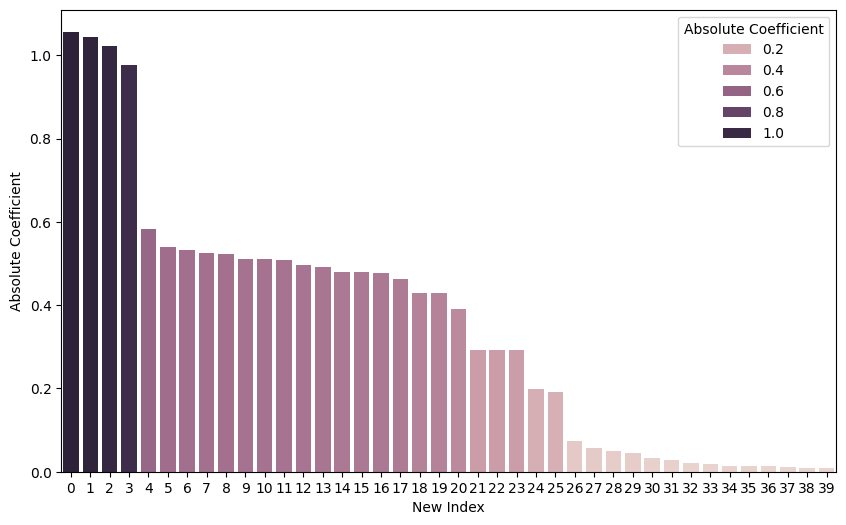

In [16]:
# Visualizing coefs in coef_df
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=coef_df_sorted, x='new_index', y='Absolute Coefficient', hue='Absolute Coefficient')
plt.xlabel('New Index')

Text(0.5, 0, 'New Index')

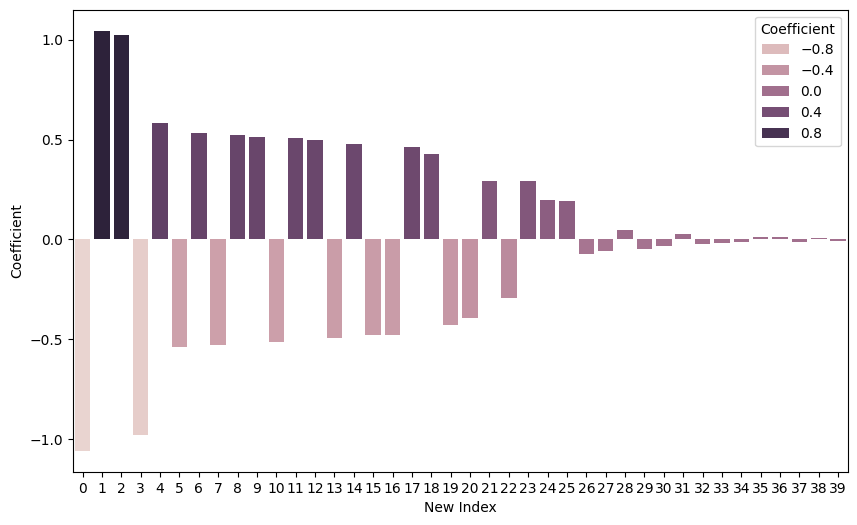

In [21]:
# Visualizing coefs in coef_df
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=coef_df_sorted, x='new_index', y='Coefficient', hue='Coefficient')
plt.xlabel('New Index')

In [32]:
# Top 5 features with highest absolute coefficients
coef_df_sorted.head(5)

,Feature,Coefficient,Absolute Coefficient,new_index
4,cat_ohe__Access_to_Resources_Low,-1.056906,1.056906,0
3,cat_ohe__Access_to_Resources_High,1.044244,1.044244,1
0,cat_ohe__Parental_Involvement_High,1.023711,1.023711,2
1,cat_ohe__Parental_Involvement_Low,-0.977973,0.977973,3
13,cat_ohe__Family_Income_High,0.582719,0.582719,4


In [33]:
# Top 5 features with lowest absolute coefficients
coef_df_sorted.tail(5)

,Feature,Coefficient,Absolute Coefficient,new_index
32,cat_ohe__Gender_Female,0.012870,0.012870,35
5,cat_ohe__Access_to_Resources_Medium,0.012663,0.012663,36
36,remainder__Sleep_Hours,-0.012517,0.012517,37
19,cat_ohe__School_Type_Private,-0.008589,0.008589,38
20,cat_ohe__School_Type_Public,0.008589,0.008589,39


In [26]:
# Top 5 negative coefficients
coef_df.sort_values('Coefficient', ascending=True).head()

,Feature,Coefficient,Absolute Coefficient
4,cat_ohe__Access_to_Resources_Low,-1.056906,1.056906
1,cat_ohe__Parental_Involvement_Low,-0.977973,0.977973
21,cat_ohe__Peer_Influence_Negative,-0.539524,0.539524
14,cat_ohe__Family_Income_Low,-0.525572,0.525572
9,cat_ohe__Motivation_Level_Low,-0.511525,0.511525


In [27]:
# Top 5 positive coefficients
coef_df.sort_values('Coefficient', ascending=False).head()

,Feature,Coefficient,Absolute Coefficient
3,cat_ohe__Access_to_Resources_High,1.044244,1.044244
0,cat_ohe__Parental_Involvement_High,1.023711,1.023711
13,cat_ohe__Family_Income_High,0.582719,0.582719
8,cat_ohe__Motivation_Level_High,0.532356,0.532356
16,cat_ohe__Teacher_Quality_High,0.524050,0.524050
